In [72]:
# Import all necessary libraries.
import pandas as pd
import numpy as np
from six import StringIO
import pydot
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report

In [73]:
seed = 6
np.random.seed(seed)

In [74]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 500)
    x2s = np.linspace(axes[2], axes[3], 500)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=14)
        plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

### Gerando a base de dados.

Geramos duas classes que são linearmente separáveis.

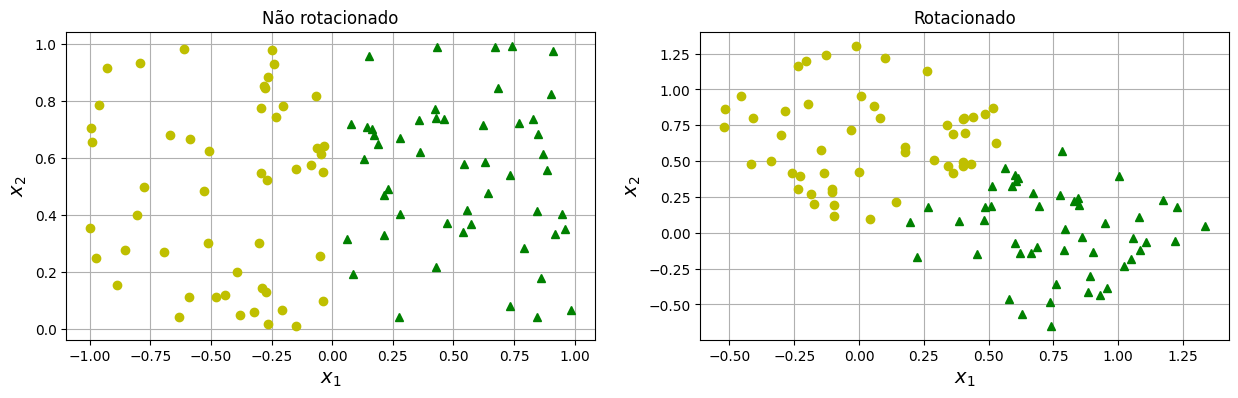

In [75]:
Xpp = np.random.rand(50, 2) + np.array([0.025, 0]).reshape(1,2)
Xpn = (np.random.rand(50, 2).dot(np.diag([-1, 1]).reshape(2,2))) + np.array([-0.025, 0]).reshape(1,2)
Xs = np.vstack([Xpp, Xpn])
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

# Rotation by 45 degrees.
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.title('Não rotacionado')
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "yo")
plt.plot(Xs[:, 0][ys==2], Xs[:, 1][ys==2], "g^")
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.grid()

plt.subplot(122)
plt.title('Rotacionado')
plt.plot(Xsr[:, 0][ys==0], Xsr[:, 1][ys==0], "yo")
plt.plot(Xsr[:, 0][ys==2], Xsr[:, 1][ys==2], "g^")
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.grid()

plt.show()

## Treinando alguns modelos

Comparando a classficação feita por uma árvore de decisão e um regressor logístico em cima de dados rotacionados de 45 graus.

São treinados 3 modelos:
- Árvore de decisão com dados não-rotacionados
- Árvore de devisão com dados rotacionados
- Regressor logístico com dados rotacionados

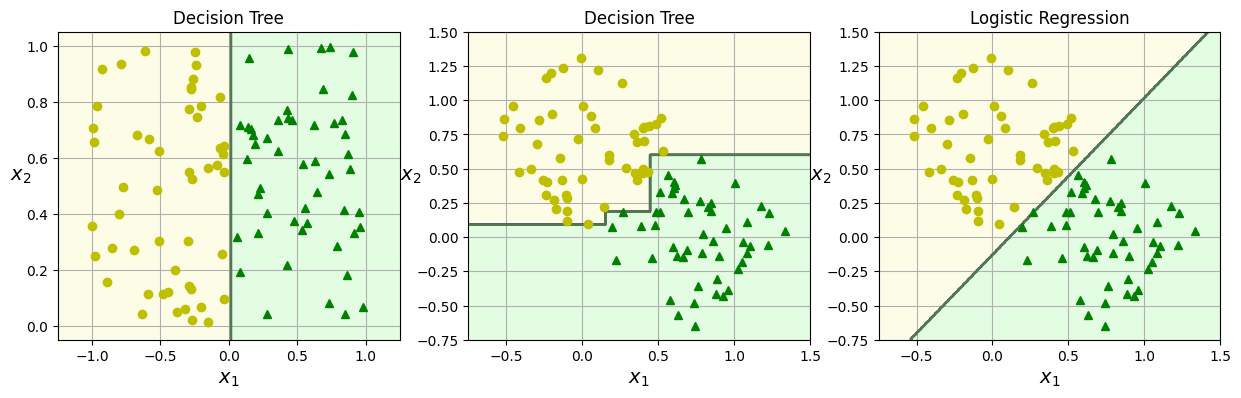

In [76]:
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)

y_pred_s = tree_clf_s.predict(Xs)

tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

y_pred_sr = tree_clf_sr.predict(Xsr)

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(Xsr, ys)

y_pred_lr_sr = lr_clf.predict(Xsr)

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.title('Decision Tree')
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-1.25, 1.25, -0.05, 1.05], iris=False)
plt.grid()
plt.subplot(132)
plt.title('Decision Tree')
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.75, 1.5, -0.75, 1.5], iris=False)
plt.grid()
plt.subplot(133)
plt.title('Logistic Regression')
plot_decision_boundary(lr_clf, Xsr, ys, axes=[-0.75, 1.5, -0.75, 1.5], iris=False)
plt.grid()

plt.show()

In [77]:
accuracy_s = accuracy_score(ys, y_pred_s)

print('accuracy DT: ', accuracy_s)

accuracy_sr = accuracy_score(ys, y_pred_sr)

print('accuracy DT rotated: ', accuracy_sr)

accuracy_lr_sr = accuracy_score(ys, y_pred_lr_sr)

print('accuracy LR rotated: ', accuracy_lr_sr)

accuracy DT:  1.0
accuracy DT rotated:  1.0
accuracy LR rotated:  0.99


## Observações

+ As figuras acima mostram um conjunto de classes linearmente separáveis:
    + À esquerda, uma árvore de decisão pode dividi-lo facilmente, um único nó já é suficiente para a separação.
        + Fronteira de separação simples.
    
    + Enquanto ao centro, depois que o conjunto de dados é rotacionado de 45°, a fronteira da decisão parece desnecessariamente complicada (complexa). São necessários vários nós para se obter a separação das classes.
        + Fronteira de separação tem complexidade maior do que a necessária (i.e., sobreajuste). Não generaliza bem.
        
    + Já a figura à direita mostra a fronteira de decisão para um classificador utilizando regressão logística. Ele encontra um separador linear que irá generalizar bem.
       + Cria um novo sistema de coordenadas que capturam a maior parte da variância dos atributos.


+ Embora ambas as árvores de decisão classifiquem perfeitamente o conjunto de treinamento, é muito provável que o modelo ao centro não generalize bem.


+ Uma maneira de minimizar esse problema é usar Análise de Componentes Principais (PCA), que rotaciona e dimensiona linearmente a matriz de atributos, resultando em uma melhor orientação dos dados de treinamento.


<img src="https://github.com/zz4fap/tp555-ml/blob/main/figures/pca.png?raw=1" width="600px">

## Aplicando PCA

In [78]:
from sklearn.decomposition import PCA

pca = PCA()
Xsrd = pca.fit_transform(Xsr)

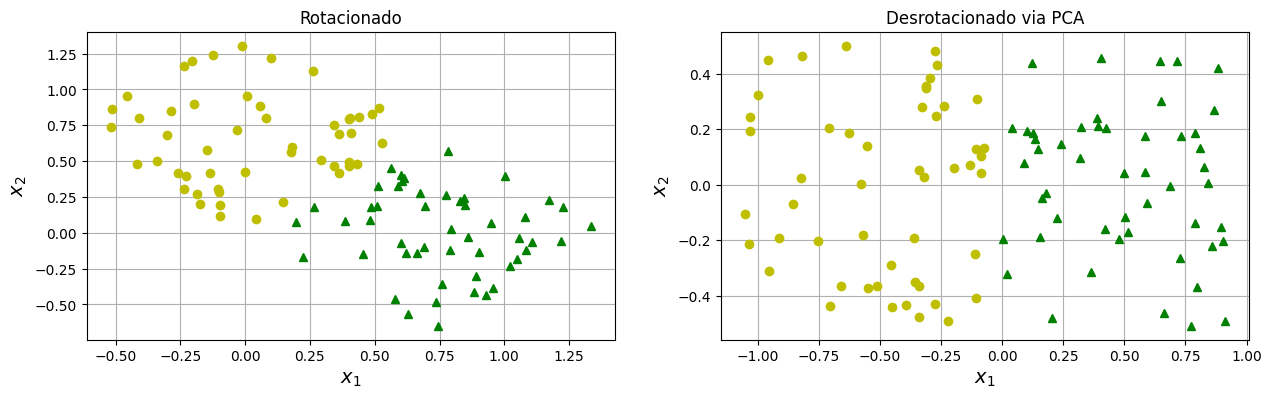

In [79]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.title('Rotacionado')
plt.plot(Xsr[:, 0][ys==0], Xsr[:, 1][ys==0], "yo")
plt.plot(Xsr[:, 0][ys==2], Xsr[:, 1][ys==2], "g^")
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.grid()

plt.subplot(122)
plt.title('Desrotacionado via PCA')
plt.plot(Xsrd[:, 0][ys==0], Xsrd[:, 1][ys==0], "yo")
plt.plot(Xsrd[:, 0][ys==2], Xsrd[:, 1][ys==2], "g^")
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.grid()

plt.show()

### Treinando uma nova árvore nos dados desrotacionados.

In [80]:
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xsrd, ys)

y_pred_s = tree_clf_s.predict(Xsrd)

accuracy_s = accuracy_score(ys, y_pred_s)

print('accuracy DT: ', accuracy_s)

accuracy DT:  1.0


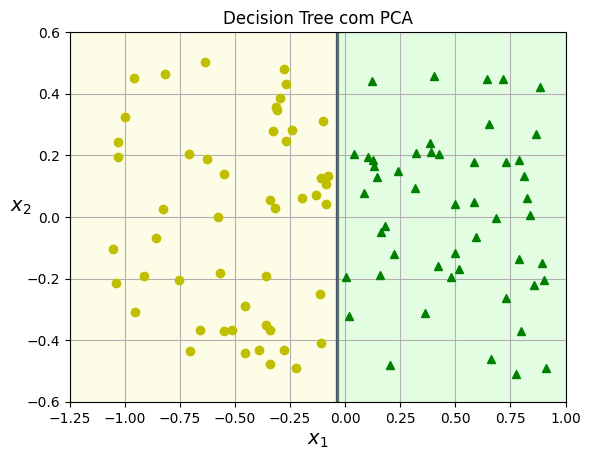

In [81]:
plt.figure()
plt.title('Decision Tree com PCA')
plot_decision_boundary(tree_clf_s, Xsrd, ys, axes=[-1.25, 1, -0.6, 0.6], iris=False)
plt.grid()